<a href="https://colab.research.google.com/github/rzorzal/redes_neurais_trabalho_1/blob/master/redes_neurais_trabalho_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho de Redes Neurais 1

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin

In [93]:
def geraDataset(tam):
  X = np.random.uniform(size=(tam,2))
  y = np.array(X[:,0] > X[:, 1], dtype=int) * 2 -1
  return X, y

In [94]:
def plotDataset(X,y):
  for k in set(y):
    plt.plot(X[:,0][y==k], X[:,1][y==k], 'o', alpha=0.3)

def plotVector(vector, cor="k"):
  origem = [0,0]
  plt.arrow(*origem, *vector, color=cor)

def perpendicular(v):
  perp = np.array(v[::-1])
  perp[0] *= -1
  return perp

In [120]:
class CustoPerceptron():
  def __init__(self):
    pass
  @staticmethod
  def erro(y, ypred):
    return y - ypred
  @staticmethod
  def custo(y, ypred):
    np.sum(CustoPerceptron.erro(y, ypred)**2)
  @staticmethod
  def gradiente(y, ypred, X):
    return np.matmul(CustoPerceptron.erro(y, ypred), X)

In [118]:
class HingeLoss():
  def __init__(self):
    pass
  @staticmethod
  def erro(y, ypred):
    return np.multiply(y, ypred)
  @staticmethod
  def custo(y, ypred):
    np.sum(1 - HingeLoss.erro(y, ypred))
  @staticmethod
  def gradiente(y, ypred, X):
    marginais = HingeLoss.erro(y, ypred) < 1
    return np.matmul(y[marginais], X[marginais])

In [122]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, custo=CustoPerceptron()):
    self.w = None
    self.activation = lambda a: (a>=0)*2-1
    self.alpha = 0.1
    self.maxiter = 100
    self.custo = custo

  def fit(self, X, y):
    self.w = np.random.uniform(-1,1, size=2)
    for _ in range(self.maxiter):
      ypred = self.predict(X)
      custo = self.custo.custo(y, ypred)
      self.w = self.w + self.alpha*self.custo.gradiente(y, ypred, X)
      if custo == 0:
        break

  def predict(self, X):
    a = np.matmul(X, self.w)
    ypred = self.activation(a)
    return ypred


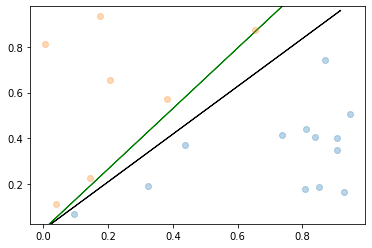

In [155]:
Xn, yn = geraDataset(20)
perceptron = Perceptron()
perceptronHingeLoss = Perceptron(custo=HingeLoss)
perceptron.fit(Xn, yn)
perceptronHingeLoss.fit(Xn, yn)
plotDataset(Xn, yn)
plotVector(perpendicular(perceptron.w), cor="green")
plotVector(perpendicular(perceptronHingeLoss.w))

0.875
[ 1.39150195 -1.04939111]
0.98
[ 0.95776304 -0.91590658]


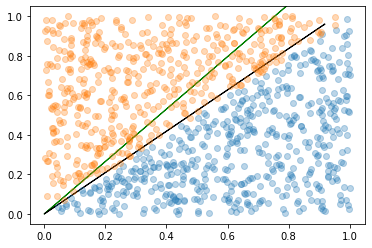

In [156]:
Xte, yte = geraDataset(1000)
ypred = perceptron.predict(Xte)
ypredHingeLoss = perceptronHingeLoss.predict(Xte)
print(sum(yte== ypred)/len(yte))
print(perceptron.w)

print(sum(yte== ypredHingeLoss)/len(yte))
print(perceptronHingeLoss.w)


plotDataset(Xte, yte)
plotVector(perpendicular(perceptron.w), cor="green")
plotVector(perpendicular(perceptronHingeLoss.w))

## Resultado

Ambos os custom são utilizados dentro de uma execusão aleatória inicial (w). Enquanto o CustoPerceptron faz a atualização para todos os elementos, o HingeLoss faz uma seleção dos que estão mais perto do w para atualizar seus valores (esse comportamento é muito parecido com o que vemos em um algoritmo linear chamado Support Vector Machine, ou SVM).

Com esse comportamento distinto o HingeLoss tem mais possibilidade de encontrar uma boa acurácia em relação ao CustoPerceptron, porém se ambos convergirem no treino e terem seus w's com pouca diferênça absoluta, a comparação entre os dois custos será irrelevante.